In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
df = pd.read_csv("Crop_recommendation.csv")
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
label = df.groupby("label")
label

In [5]:
label.get_group("rice")

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
95,88,46,42,22.683191,83.463583,6.604993,194.265172,rice
96,93,47,37,21.533463,82.140041,6.500343,295.924880,rice
97,60,55,45,21.408658,83.329319,5.935745,287.576694,rice
98,78,35,44,26.543481,84.673536,7.072656,183.622266,rice


In [6]:
label[["humidity"]].mean()     #finds mean for every humidity column.

,humidity
label,
apple,92.333383
banana,80.358123
blackgram,65.118426
chickpea,16.860439
coconut,94.844272
coffee,58.869846
cotton,79.843474
grapes,81.875228
jute,79.639864


In [7]:
lables = list(label.mean().index)
lables

['apple',
 'banana',
 'blackgram',
 'chickpea',
 'coconut',
 'coffee',
 'cotton',
 'grapes',
 'jute',
 'kidneybeans',
 'lentil',
 'maize',
 'mango',
 'mothbeans',
 'mungbean',
 'muskmelon',
 'orange',
 'papaya',
 'pigeonpeas',
 'pomegranate',
 'rice',
 'watermelon']

In [8]:
nitrogen = list(label[["N"]].mean().values.ravel())
nitrogen

[np.float64(20.8),
 np.float64(100.23),
 np.float64(40.02),
 np.float64(40.09),
 np.float64(21.98),
 np.float64(101.2),
 np.float64(117.77),
 np.float64(23.18),
 np.float64(78.4),
 np.float64(20.75),
 np.float64(18.77),
 np.float64(77.76),
 np.float64(20.07),
 np.float64(21.44),
 np.float64(20.99),
 np.float64(100.32),
 np.float64(19.58),
 np.float64(49.88),
 np.float64(20.73),
 np.float64(18.87),
 np.float64(79.89),
 np.float64(99.42)]

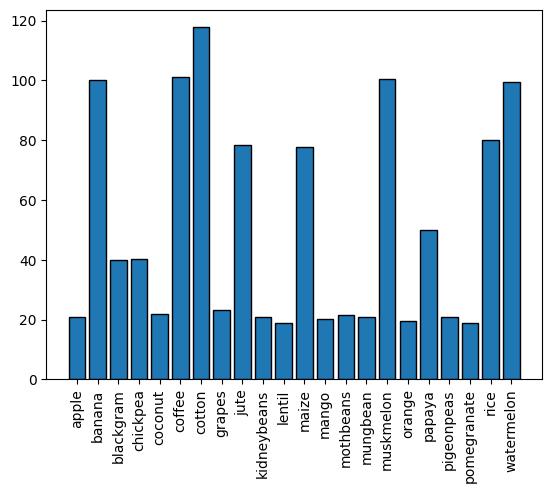

In [9]:
plt.bar(x=lables, height=nitrogen, ec="k")   #ec == edge color
plt.xticks(rotation = 90)
plt.show()

In [10]:
x = df.drop("label", axis= 1)

In [11]:
#standardscaler ---- normalise --- outliers se deal krne ke liye
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_transfromed = sc.fit_transform(x)
x_transfromed.shape


(2200, 7)

In [12]:
desc = pd.DataFrame(x_transfromed).describe()
desc

,0,1,2,3,4,5,6
count,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03,2.200000e+03
mean,-1.033517e-16,5.167584e-17,-5.167584e-17,3.875688e-16,-1.808654e-16,-1.291896e-16,1.550275e-16
std,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00,1.000227e+00
min,-1.369636e+00,-1.466498e+00,-8.521355e-01,-3.316592e+00,-2.570842e+00,-3.831577e+00,-1.515170e+00
25%,-8.006682e-01,-7.690712e-01,-5.559060e-01,-5.623337e-01,-5.040636e-01,-6.433340e-01,-7.081870e-01
50%,-3.671690e-01,-7.164472e-02,-3.189225e-01,-3.466729e-03,4.039475e-01,-5.742697e-02,-1.564454e-01
75%,9.130086e-01,4.438444e-01,1.680429e-02,5.817982e-01,8.296508e-01,5.869540e-01,3.786243e-01
max,2.423483e+00,2.778707e+00,3.097591e+00,3.567190e+00,1.280400e+00,4.478912e+00,3.550701e+00


In [13]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [14]:
desc_formatted = desc.applymap(lambda x : f"(int(x):d)")
desc_formatted

C:\Users\pc\AppData\Local\Temp\ipykernel_2408\280828124.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  desc_formatted = desc.applymap(lambda x : f"(int(x):d)")


,0,1,2,3,4,5,6
count,(int(x):d),(int(x):d),(int(x):d),(int(x):d),(int(x):d),(int(x):d),(int(x):d)
mean,(int(x):d),(int(x):d),(int(x):d),(int(x):d),(int(x):d),(int(x):d),(int(x):d)
std,(int(x):d),(int(x):d),(int(x):d),(int(x):d),(int(x):d),(int(x):d),(int(x):d)
min,(int(x):d),(int(x):d),(int(x):d),(int(x):d),(int(x):d),(int(x):d),(int(x):d)
25%,(int(x):d),(int(x):d),(int(x):d),(int(x):d),(int(x):d),(int(x):d),(int(x):d)
50%,(int(x):d),(int(x):d),(int(x):d),(int(x):d),(int(x):d),(int(x):d),(int(x):d)
75%,(int(x):d),(int(x):d),(int(x):d),(int(x):d),(int(x):d),(int(x):d),(int(x):d)
max,(int(x):d),(int(x):d),(int(x):d),(int(x):d),(int(x):d),(int(x):d),(int(x):d)


In [15]:
from sklearn.cluster import KMeans

kmeans = KMeans()
kmeans.fit(x_transfromed)

,n_clusters,8
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [16]:
label = kmeans.labels_

In [17]:
df["cluster_8"] = label

In [18]:
df

,N,P,K,temperature,humidity,ph,rainfall,label,cluster_8
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee,1
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee,4
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee,1
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee,4


In [19]:
df["cluster_8"].value_counts()

cluster_8
5    457
4    355
1    308
6    293
3    284
2    200
0    200
7    103
Name: count, dtype: int64

In [20]:
df[df["label"] == "rice"]["cluster_8"].value_counts()

cluster_8
1    100
Name: count, dtype: int64

In [21]:
df[df["cluster_8"] == 1]["label"].value_counts()

label
rice          100
jute           99
coffee         53
papaya         47
coconut         6
pigeonpeas      3
Name: count, dtype: int64

In [22]:
##met
from sklearn.metrics import silhouette_score 
## range -1 to 1 
silhouette_score(x_transfromed, label)

0.31749099408160514

In [23]:
# WCSS = INHERATIA
kmeans.inertia_

4907.994253200928

In [24]:
WCSS = {}
for i in range(5,51):
  kmeans = KMeans(n_clusters= i)
  kmeans.fit(x_transfromed)
  WCSS[i] = kmeans.inertia_

In [25]:
WCSS

{5: 7207.490308261162,
 6: 6619.407918367753,
 7: 5824.263458674478,
 8: 4883.880124988108,
 9: 4472.498868217954,
 10: 4313.052040733888,
 11: 3845.0878403392535,
 12: 3756.2999959657277,
 13: 3500.8098690329034,
 14: 3244.1941452252217,
 15: 3110.9480578641123,
 16: 2905.918122705221,
 17: 2785.963995384491,
 18: 2682.7097585050287,
 19: 2707.2616961101235,
 20: 2469.2829000545444,
 21: 2440.39829903816,
 22: 2235.6036790768753,
 23: 2144.4871839525485,
 24: 2105.720314835025,
 25: 2011.5372861116118,
 26: 1969.9179850360817,
 27: 1928.544941977927,
 28: 1881.719190771559,
 29: 1833.3531798737295,
 30: 1774.7367423824776,
 31: 1725.4814905636422,
 32: 1760.5872516476993,
 33: 1757.509836274949,
 34: 1614.6671887942712,
 35: 1580.768345520828,
 36: 1518.1369276165078,
 37: 1512.0167432672476,
 38: 1540.6094049908763,
 39: 1479.0809949109982,
 40: 1428.692010892934,
 41: 1422.3178819007087,
 42: 1398.903545462452,
 43: 1370.543912466524,
 44: 1357.2290602718458,
 45: 1347.4234913668608

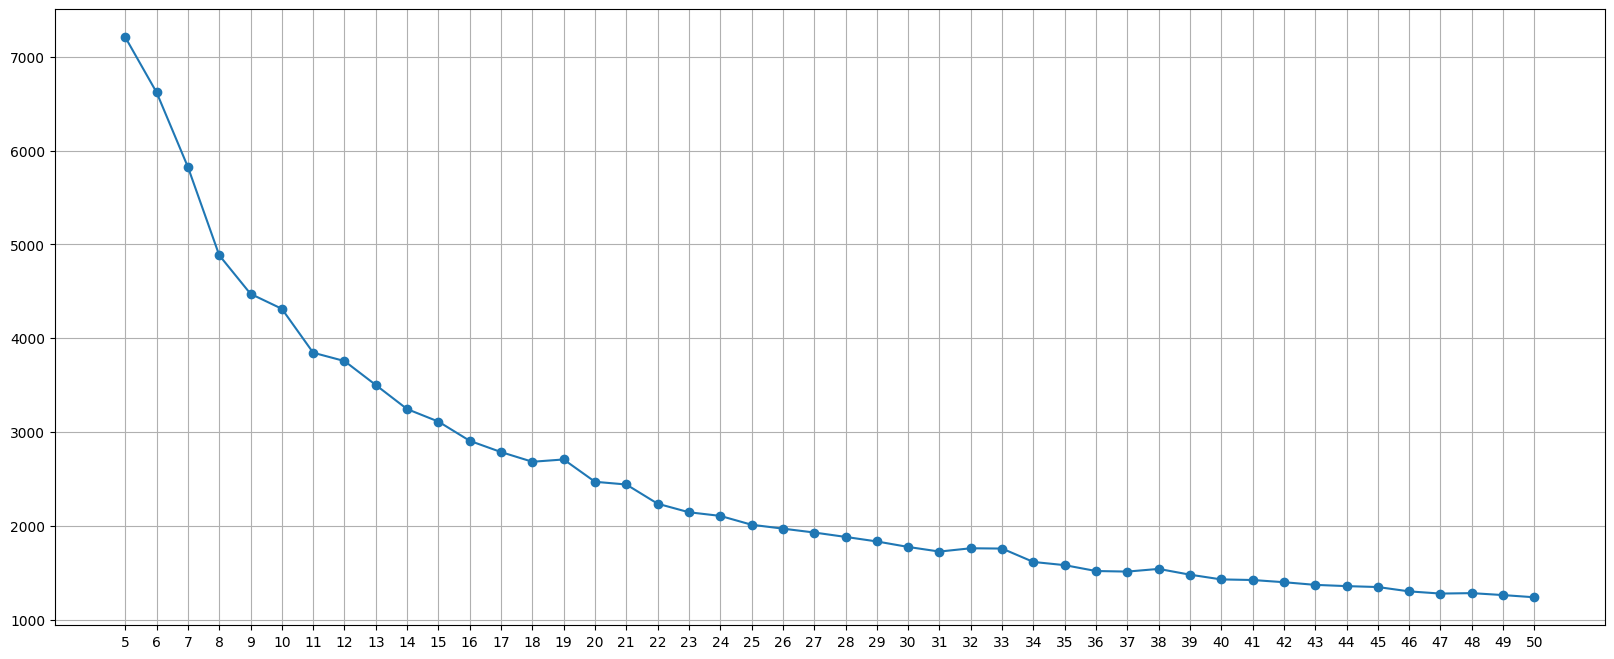

In [26]:
plt.figure(figsize=(20,8))
plt.plot(WCSS.keys(), WCSS.values(), marker = "o")

#adding a line

plt.xticks(list(WCSS.keys()))
plt.grid(True)
plt.show()

In [27]:
import joblib

joblib.dump(kmeans, "crop_reco_kmeans.lb")

['crop_reco_kmeans.lb']

In [28]:
joblib.dump(sc,"scaler.lb")

['scaler.lb']

In [29]:
joblib.dump(df, "crop_reco_df.lb")

['crop_reco_df.lb']